# Semester Project: Milestone 1
By: Satwik Chandra, Alex Daly, and Josh Ellis  
Class: ISQA 8156-850 Advanced Statistical Methods  
Date: 10/23/2022

### **Section 1: What are the research questions that you are looking at? What the are the underlying hypotheses?**
Omaha Girls Rock is a local non-profit organization that seeks to use music to grow the young girls in the community. By teaching them music and giving them outlets to perform, they seek to create identities of self. As part of this program, the organization conducts surveys before and after the girls participate in the program to see how their skills have improved. These questions ask the girls to rate their likelihood of doing various activities, such as wearing the kind of clothes they like even if they are different from others to making friends their age, on a scale of 1-7 (1 being the least likely to 7 being the most). Additionally, there were three statements where they were to either agree or disagree to a varying degree. We want to analyze these results to make recommendations on how Omaha Girls Rock can improve their programs.

First, we would like to see if there was any significant difference in how the girls answered the questions before and after their program based on if they were in the older group (10-12) or the younger group (13-16). We believe that the girls should show growth for each response, regardless of what age group they are a part of. This information would tell them which age groups they need to focus on in building the skills that are associated with that given question. For example, if girls in the younger age group showed that significantly they did not improve or was worse at being able to express their feelings to another kid, the organization could work with the girls 10-12 on how to express themselves more.

Second, we would like to examine the results to see if there were any significant differences between how the girls answered the survey based on their race. Again, we expect there to be no significant differences in how the girls answer each question regarding their race. If we do find a significant difference though, Omaha Girls Rock would then know how to better cater their activities to the community. No organization wants to show that a specific group is being treated unequally compared to others. This will let them know of any blind spots they might have and work to correct them.


---

### **Section 2: Data**
The data in the dataset pertains to a survey of girls, ages 8-14, before and after participation in the OGR Academy offered by the Omaha Girls Rock Organization. The dataset consists of age, Years at Camp, Race/Ethnicity, and Zip Code of the participants in the program.

#### **Data Processing**
- *Note that the full code for data processing is at the bottom of this document.*

##### Issue 1: Many Tables
Instead of having 8 datasets to do analysis on, all the data was combined to a single table, where fields such as age_group, year, and test_type were added as new fields. These new fields allowed us to identify what each data observation represents (i.e., Older Group, 2019, Pre-Test). We can filter on these fields to subset the data in anyway we want, while only needing to read from and work with a single table.

##### Issue 2: Missing Data
There were some instances where a question did not have a score for a given observation. Since the data we are working with is ordinal, we replaced and missing data with the mode of that question. Since the amount of missing data only makes up < 1% of the total dataset, we do not risk altering the true results of the survey.

##### Issue 3: Various Data Representations
In the Years at Camp field, some survey results include the superscript of the year, (1st, 2nd, 3rd), while others did not (1, 2, 3). Since it is appropriate to cast this field as an integer, all superscripts were removed and set to an integer type.

##### Issue 4: Class Imbalance
At first look into the race/ethnicity field, there were 17 unique groups of race/ethnicity. There was no standardized way to collect this data in the survey, therefore there were differences in the way a race is references also the order of races if an individual is multi-racial. During data processing, a cleaning procedure is done to reclassify race/ethnicity by standardizing all these different factors. This left us with 12 standardized unique groups.  

However, classes were still highly unbalanced: 250 Caucasian, 53 Black, and the remaining 10 groups all have less than 10 data points. To overcome this, race/ethnicity was further grouped into 4 primary groups: Caucasian, Black, Multi-Racial, and Other.

##### Issue 5: Non-Numeric Scores
The last three questions in the survey do not contain numeric answers, instead they are categorized as strings with 6 levels from strongly disagree to strongly agree. We used a numeric dictionary ranging from 1 to 6 to enumerate these values into numbers to aid numerical analysis.

---

### **Section 3: Descriptive Statistics about the Data**
The aim of the descriptive statistics section was to understand the underlaying dataset of which we will continue to use for inferential statistical analysis. This analysis lead us to understand the existing patterns and distributions of the survey to better prepare ourselves before progressing on to making inferences about the survey.

Contents:
1. Distributions of Relevant Attributes for Analysis (Race/Ethnicity and Age)
    - Count of Participants by Race/Ethnicity
    - Count of Participants by Age Group
2. Distributions of Mean and Variation for Survey Scores Across all Questions
    - Summary Table for Numeric Features
    - Kernal Density Estimation (KDE) for Means and Standard Deviations
    - Box and Whisker Plot for Scores
3. Correlation Between Survey Questions
4. Visualizing the delta between pre-test and post-test scores for groups of interest

Library and Data Imports

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(
    'C:/Users/Josh Ellis/OneDrive - University of Nebraska at Omaha/' +
    'COURSES/FALL_2022/ISQA8156-820/course-project'
)

data = pd.read_csv('data/clean/girls_rock_data.csv')

### Descriptive Statistical Analysis 1: Distributions of Relevant Attributes for Analysis (Race/Ethnicity and Age)
The following plots depict the two attributes that are relveant for our statistical analysis. Figure 1, shows the count of participants within each Race/Ethnicty group in the processed data. It is clear that an imbalance exists between the race/ethnicity groups, most notably that Caucasians are the dominate group in the survey data. We will have to consider this imbalance in our analysis and be aware of the affects that class imbalance has on the results. Figure 2 shows the count of participants within each age group in the processed data. Unlike race/ethnicity, we can ensure that class imbalance will not be an issue for analysis between age groups. Interestingly, there is a much more significant reduction in older group participants between 2018 and 2019. This could indicate the there were more students who “graduated” from the program in 2018 than girls who joined the program in years after that graduating group. 

Text(0.5, 1.0, 'Count of Students by Age Group')

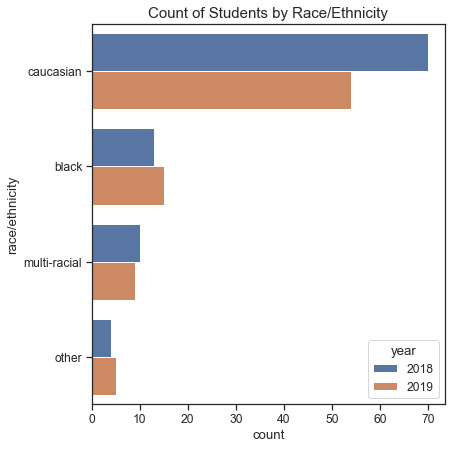

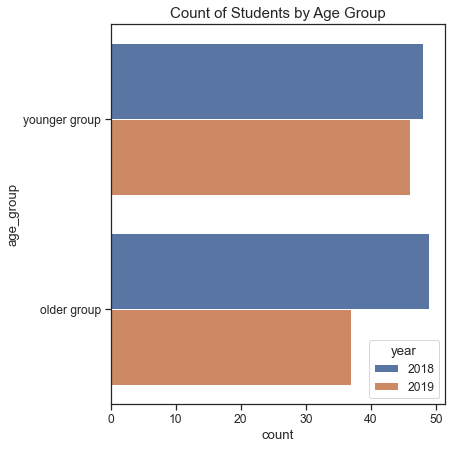

In [14]:
# count of participants within each Race/Ethnicty group
sns.set(font_scale=1.1)
sns.set_color_codes("pastel")
sns.set_style('ticks')
plt.figure(figsize=(6.33,7))
sns.countplot(
    y="race/ethnicity",
    data=data[data['test_type']=='pre-test'],
    order = data['race/ethnicity'].value_counts().index,
    hue='year'
)

plt.title('Count of Students by Race/Ethnicity', fontsize=15)

# count of participants within each age group
sns.set(font_scale=1.1)
sns.set_color_codes("pastel")
sns.set_style('ticks')
plt.figure(figsize=(6,7))
sns.countplot(
    y="age_group",
    data=data[data['test_type']=='pre-test'],
    order = data['age_group'].value_counts().index,
    hue='year'
)

plt.title('Count of Students by Age Group', fontsize=15)

### Descriptive Statistical Analysis 2: Distributions of Mean and Variation for Survey Scores Across all Questions

##### Summary Table for Numeric Features

In [4]:
data_stats = data.describe().T[['mean', 'std', 'min', 'max']].drop(index=['year', 'zip_code'])
data_stats

,mean,std,min,max
age,12.822715,1.690376,10.0,16.0
years_at_camp,2.836565,1.970165,1.0,8.0
15. Wear the kind of clothes you like even if they are different from what others wear.,6.094183,1.265787,2.0,7.0
"16. In a line-up, tell a student who pushes in front of you to wait his or her turn.",5.542936,1.501466,1.0,7.0
17. Stand up for yourself when another kid in class makes fun of you.,5.864266,1.299946,1.0,7.0
18. Help a student who is visiting your school for a short time to have fun and interesting experiences.,5.922438,1.152085,2.0,7.0
19. Join a school club or sports team.,6.019391,1.480301,1.0,7.0
20. Express your feelings to another kid.,4.739612,1.691091,1.0,7.0
21. Ask someone over to your house on a Saturday.,5.883657,1.399517,1.0,7.0
22. Ask someone to go to a school dance or movie with you.,4.662050,1.807984,1.0,7.0


##### Kernal Density Estimation (KDE) for Means and Standard Deviations

The following KDE plots depict the average (mean) scores and standard deiviations accross all question in the survey for 2018 and 2019. The average of all scores is 5.20. It is important to note here that the last 3 questions (1, 2, and 3) are scored differently that the rest of the question (15-25), which is why we see an almost bimodel distribution, however, seperating these groups of questions would result in two unimodel distrubtions with means centered around 5.45 (questions 15-25) and 2.5 (questions 1-3 at the end at the end of the survey). The distribution of the standard deviation between all scores is mostly normal with a slight skew to the right. The standard deviation tends to fall between 1.15 and 1.8 for the questions in the survey.

Text(0.5, 1.0, 'Mean Scores for all Questions')

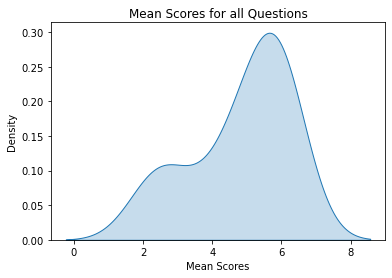

In [6]:
# KDE for Means
sns.kdeplot(
    data = data_stats.drop(index=['age', 'years_at_camp']),
    x='mean',
    fill=True)
plt.xlabel('Mean Scores')
plt.title('Mean Scores for all Questions')

Text(0.5, 1.0, 'Standard Deviations for all Questions')

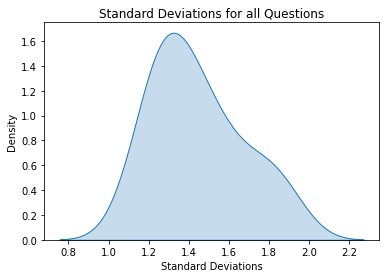

In [7]:
# KDE for Standard Deviations
sns.kdeplot(
    data=data_stats.drop(index=['age', 'years_at_camp']),
    x='std',
    fill=True)
plt.xlabel('Standard Deviations')
plt.title('Standard Deviations for all Questions')

##### Box and Whisker Plot for Scores
The Box and Whisker plot below shows the distribution of scores for each question for pre-test and post-test survey results.
- Findings:
    - There seems to be a large range of scores for every question
    - The mean scores tend to be around 6 with the exception of questions 20, 22, and 23
    - The mean scores seem to increase in post-test scores with less variation

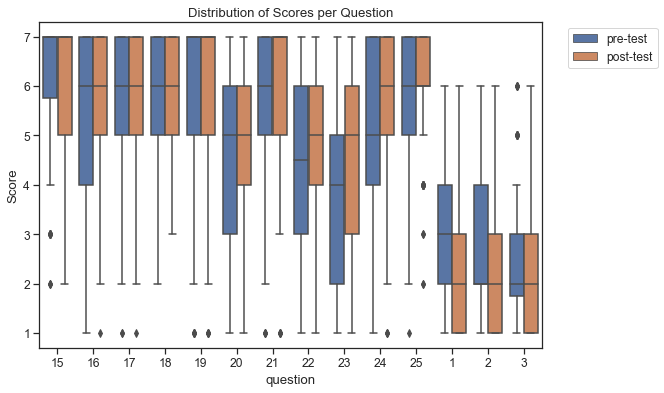

In [53]:
boxplot_df = data.copy()
boxplot_df = boxplot_df.drop(columns=['age_group', 'year', 'age', 'years_at_camp', 'race/ethnicity', 'zip_code'])
boxplot_df.columns = [col.split('.')[0] for col in boxplot_df.columns]
boxplot_df = boxplot_df.melt(id_vars='test_type', var_name='question')

plt.figure(figsize=(9,6))
sns.boxplot(
    data=boxplot_df,
    x='question',
    y='value',
    hue='test_type')
plt.title('Distribution of Scores per Question')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

### Descriptive Statistical Analysis 3: Correlation Between Survey Questions

The heatmap displays all correlations between the scores for every question. There are not cases of high correlations but there are several for moderate correlation, especially when compared to some of the other questions:
- Question Pairs 16 & 17, 19 & 21 , 23 & 24 have the highest correlations
- Question Pairs 15 & 18, 15 & 19, 15 & 21, 16 & 21 have the lowest correlations

Text(0.5, 1.0, 'Correlation Heatmap')

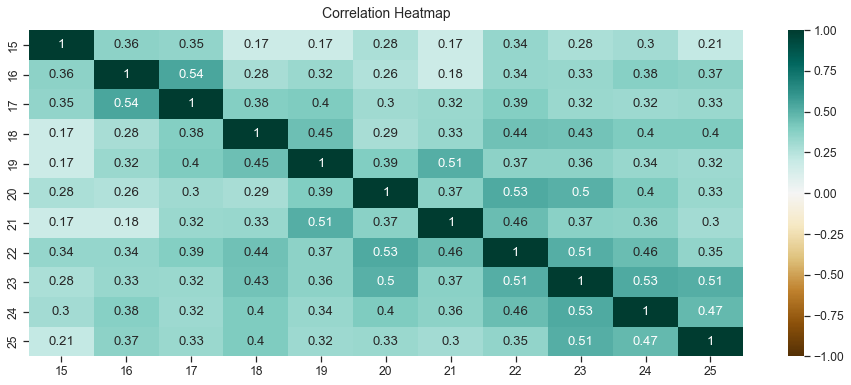

In [137]:
# Set a copy of the data
data_corr = data.copy()

# Transform data to a correlation matrix
data_corr = data_corr.iloc[:, 7:18]
data_corr.columns = [col.split('.')[0] for col in data_corr.columns]

# Plot Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

### Descriptive Statistical Analysis 4: Measuring the delta between pre-test and post-test scores for groups of interest

The final analysis below shows the change in scores between pre-test and post-test for different groups:
- Grouping 1: Race/Ethnicity
- Grouping 2: Age Group

The scores between questions and groups of interest do seem to follow a pattern: The scores seem to increase and decrease together for all groups in both groupings

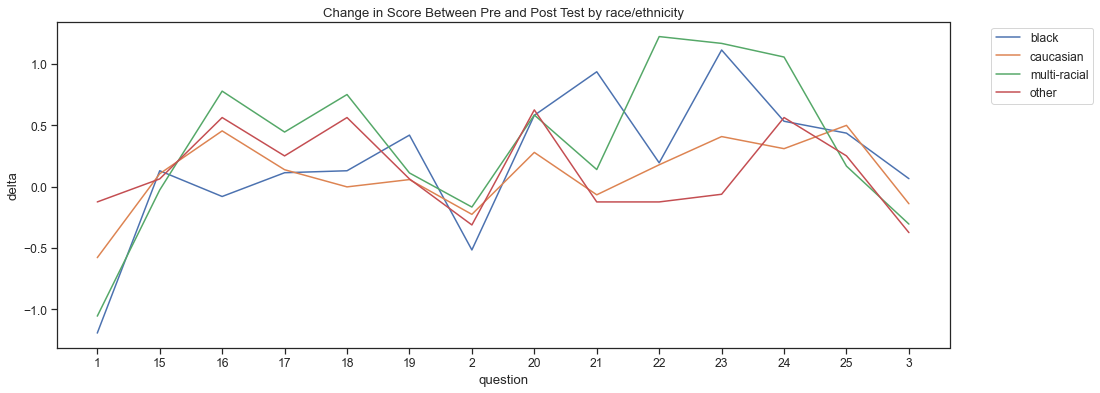

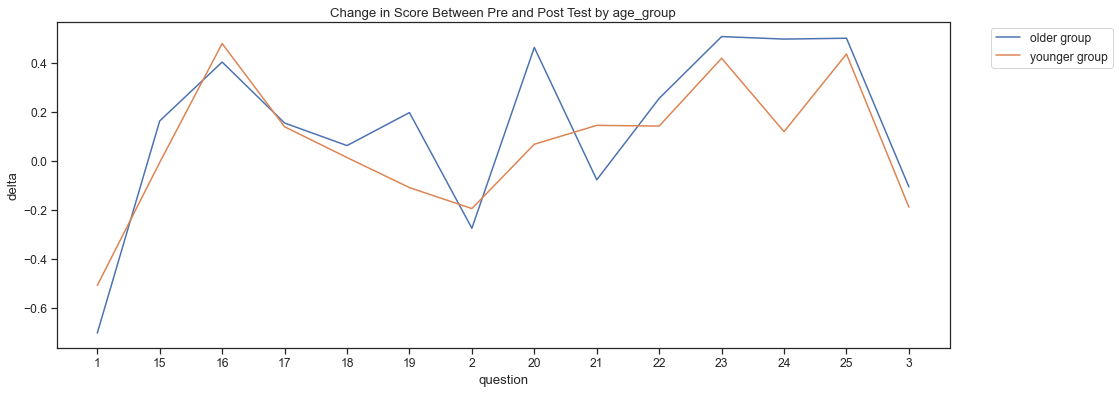

In [29]:
# Transform pre-test results
pretest_df = data[data['test_type'] == 'pre-test'].copy()

pretest_df.drop(
    columns=['zip_code', 'test_type', 'years_at_camp'],
    inplace=True)

pretest_df = pretest_df.melt(
    id_vars=pretest_df.iloc[:, 0:4].columns,
    var_name='question',
    value_name='score_pretest')

# Transform post-test results
posttest_df = data[data['test_type'] == 'post-test'].copy()

posttest_df.drop(
    columns=['zip_code', 'test_type', 'years_at_camp'],
    inplace=True)

posttest_df = posttest_df.melt(
    id_vars=posttest_df.iloc[:, 0:4].columns,
    var_name='question',
    value_name='score_posttest')

# Combine the melted pre and post test data
pre_post = pretest_df.merge(
    posttest_df,
    on=['age_group', 'year', 'age', 'race/ethnicity', 'question'],
    how='inner'
)

# Calculated the delta between pre-test and post-test scores
pre_post['delta'] = pre_post['score_posttest'] - pre_post['score_pretest']

# Strip the question text from the quesion number
pre_post['question'] = pre_post['question'].str.split('.').str[0]


# Visualize
def delta_groups(data, group):
    pre_post_grouped = data.groupby(by=[group, 'question'])['delta'].mean().reset_index()
    plt.figure(figsize=(16, 6))
    sns.lineplot(data=pre_post_grouped, x='question', y='delta', hue=pre_post_grouped[group].astype(str))
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.title(f'Change in Score Between Pre and Post Test by {group}')
    
delta_groups(pre_post, 'race/ethnicity')
delta_groups(pre_post, 'age_group')

---

### **Section 4: What other data will you potentially use?**
One outside data source that we potentially could use when analyzing this data set is using the Omaha census data from the last census in 2021. This will allow us to see the current demographics of the city and see how the survey participants line up. If the percentage of participants of a certain race or ethnicity is smaller than the census data, we might want to see if the difference is significant. From our initial look of the census data, we see that the Caucasian has the highest percentage at 75.5%, followed by Black at 12.1%. This does align well with our survey participant breakdown (2021).

Another data source we may reference is an age breakdown of Omaha’s citizens. Unlike the U.S. Census, this breaks the age groups down farther into 5-year periods. As with our race data source, this is to make sure that our population of survey participants is like that of the population of Omaha as a whole. It is about equal in the number of kids between 10-14 and 15-19 in the Omaha region, similarly to how the number of girls in the older and younger groups are similar. We might need to see if the difference is significant, but that will come after comparing our results for the research question (2020). 

Lastly, a data source we may want to use is the average income of a household for each zip code in Omaha. This may come into effect when looking at our results to see if financial status of each survey participants could also be affecting their survey results. Families with more resources have more privileges to help their kids develop and grow more substantially than those that do not (2022).

---

### **Section 5: Statistical Methods**

#### Research question 1: Are there significant differences in answer ratings for various outcomes in the younger group and the older group? 
Outcomes are the ratings per question, often measured on a scale from 1-7, etc. This will help OGR to better understand which aspects significantly improve over time, and identify aspects that don’t show a significant change yet.


- Test:
    - 95% Matched Sample T-test (dependent t-test) for each age group and question
    - 28 different test that will be evaluated (2 age groups x 14 Questions)

- Hypothesis for each test: 
    - $H_0: \mu_d <= 0$
    - $H_a: \mu_d > 0$

- Output:
    - Summary table with p-values for younger and older groups for each question with a description of the results

#### Research question 2: Does the race/ethnicity of participants influence the change in scores for various questions over time?
Instead of simply looking at the change in scores over time, you will also include the race/ethnicity in your considerations. Do outcomes (e.g., changes in scores) differ based on the race/ethnicity of the students? Is there a significant change for one ethnicity, but not the other?


- Test:
    - 95% One-Way ANOVA (Completely Random Design) with race/ethnicity categories for each question on the differences between pre-test and post-test scores
    - If $H_0$ is rejected, then continue analysis with Fischers LSD
    - 14 different tests for each question

- Hypothesis: 
    - $H_0: \mu_{caucasian} = \mu_{black} = \mu_{multi-racial} = \mu_{other}$
    - $H_a:$ Not all population means are equal

---

### References
Infoplease. (2000). Omaha, NE demographic statistics. Infoplease. Retrieved October 18, 2022, from https://www.infoplease.com/us/census/nebraska/omaha/demographic-statistics 

United States Census Bureau. (2021). U.S. Census Bureau quickfacts: Omaha City, Nebraska. United States Census Bureau. Retrieved October 19, 2022, from https://www.census.gov/quickfacts/omahacitynebraska 

ZipAtlas.Com. (2022). Median Household Income in Omaha, NE by Zip Code. Median household income in Omaha, NE by ZIP code. Retrieved October 18, 2022, from http://zipatlas.com/us/ne/omaha/zip-code-comparison/median-household-income.htm 
